# Homework 4

In [2]:
library(tree)

## Problem 1

### (a)

In [142]:
tahoe<-read.csv("Tahoe_Healthcare_Data.csv")

In [143]:
head(tahoe)

,age,female,flu_season,ed_admit,severity.score,comorbidity.score,readmit30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,100,1,1,1,38,112,0
2,83,1,0,1,8,109,1
3,74,0,1,0,1,80,0
4,66,1,1,1,25,4,0
5,68,1,1,1,25,32,0
6,80,1,0,1,29,172,0


In [144]:
str(tahoe)

'data.frame':	4382 obs. of  7 variables:
 $ age              : int  100 83 74 66 68 80 71 72 69 65 ...
 $ female           : int  1 1 0 1 1 1 1 0 1 1 ...
 $ flu_season       : int  1 0 1 1 1 0 0 0 0 0 ...
 $ ed_admit         : int  1 1 0 1 1 1 1 0 1 0 ...
 $ severity.score   : int  38 8 1 25 25 29 31 47 44 10 ...
 $ comorbidity.score: int  112 109 80 4 32 172 271 221 193 130 ...
 $ readmit30        : int  0 1 0 0 0 0 1 1 0 0 ...


In [145]:
tahoe$readmit30 <- factor(tahoe$readmit30)

In [146]:
str(tahoe)

'data.frame':	4382 obs. of  7 variables:
 $ age              : int  100 83 74 66 68 80 71 72 69 65 ...
 $ female           : int  1 1 0 1 1 1 1 0 1 1 ...
 $ flu_season       : int  1 0 1 1 1 0 0 0 0 0 ...
 $ ed_admit         : int  1 1 0 1 1 1 1 0 1 0 ...
 $ severity.score   : int  38 8 1 25 25 29 31 47 44 10 ...
 $ comorbidity.score: int  112 109 80 4 32 172 271 221 193 130 ...
 $ readmit30        : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 2 2 1 1 ...


In [147]:
tree_tahoe<-tree(readmit30 ~ . , data = tahoe, split = "deviance", minsize=4, mindev=1e-3)

In [148]:
tree_tahoe

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 4382 4702.000 0 ( 0.77225 0.22775 )  
    2) comorbidity.score < 121.5 3084 2440.000 0 ( 0.86511 0.13489 )  
      4) severity.score < 31.5 2423 1609.000 0 ( 0.89682 0.10318 )  
        8) comorbidity.score < 68.5 1337  616.700 0 ( 0.93867 0.06133 )  
         16) flu_season < 0.5 790  255.100 0 ( 0.96203 0.03797 )  
           32) severity.score < 14.5 444   80.120 0 ( 0.98198 0.01802 )  
             64) comorbidity.score < 64.5 415   54.130 0 ( 0.98795 0.01205 ) *
             65) comorbidity.score > 64.5 29   19.290 0 ( 0.89655 0.10345 )  
              130) severity.score < 7.5 16    0.000 0 ( 1.00000 0.00000 ) *
              131) severity.score > 7.5 13   14.050 0 ( 0.76923 0.23077 )  
                262) severity.score < 8.5 2    0.000 1 ( 0.00000 1.00000 ) *
                263) severity.score > 8.5 11    6.702 0 ( 0.90909 0.09091 ) *
           33) severity.score > 14.5 346  163.800 0 ( 0.93642

In [149]:
summary(tree_tahoe)


Classification tree:
tree(formula = readmit30 ~ ., data = tahoe, split = "deviance", 
    minsize = 4, mindev = 0.001)
Variables actually used in tree construction:
[1] "comorbidity.score" "severity.score"    "flu_season"       
[4] "age"               "female"           
Number of terminal nodes:  54 
Residual mean deviance:  0.8214 = 3555 / 4328 
Misclassification error rate: 0.1839 = 806 / 4382 

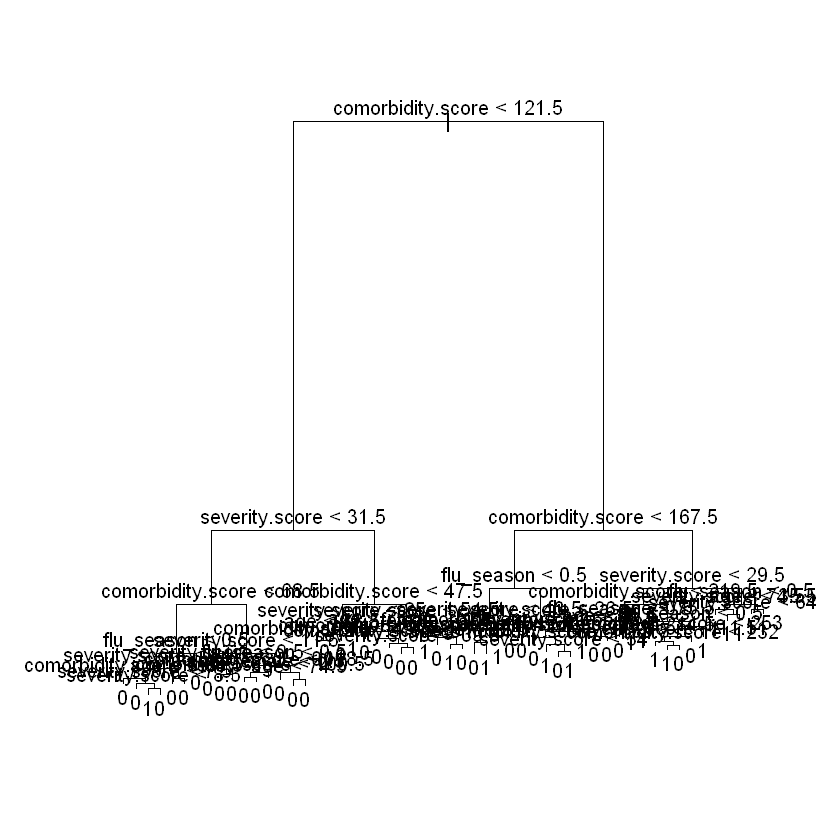

In [150]:
plot(tree_tahoe)
text(tree_tahoe,pretty=0)

### (b)

In [163]:
cv.tree_tahoe<-cv.tree(tree_tahoe, FUN = prune.misclass, K = 7)

In [164]:
names(cv.tree_tahoe)

[1] "size"   "dev"    "k"      "method"

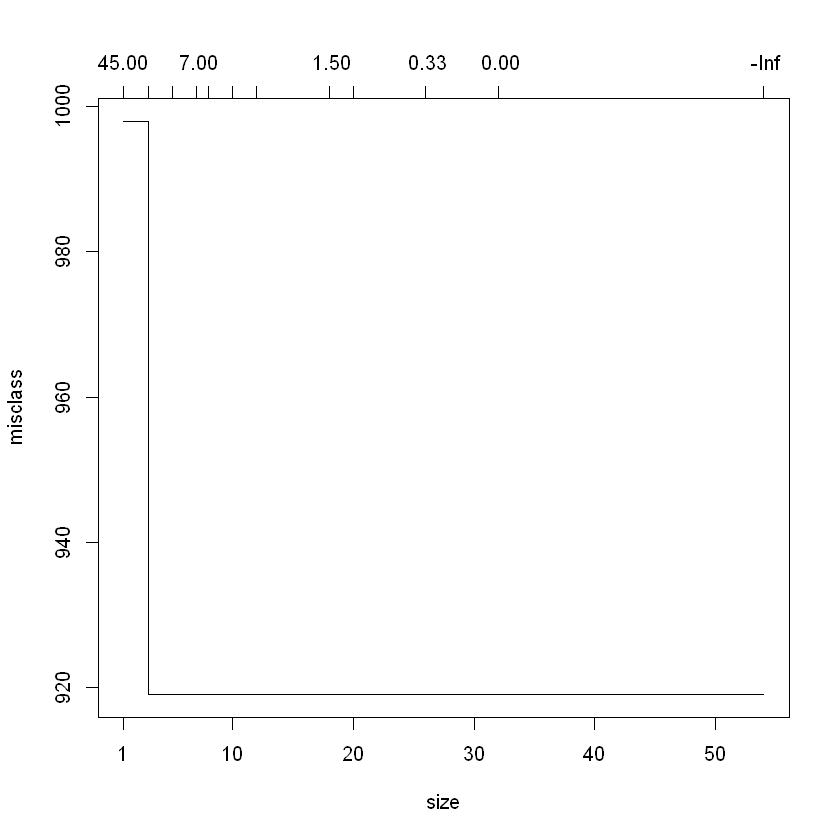

In [165]:
plot(cv.tree_tahoe)

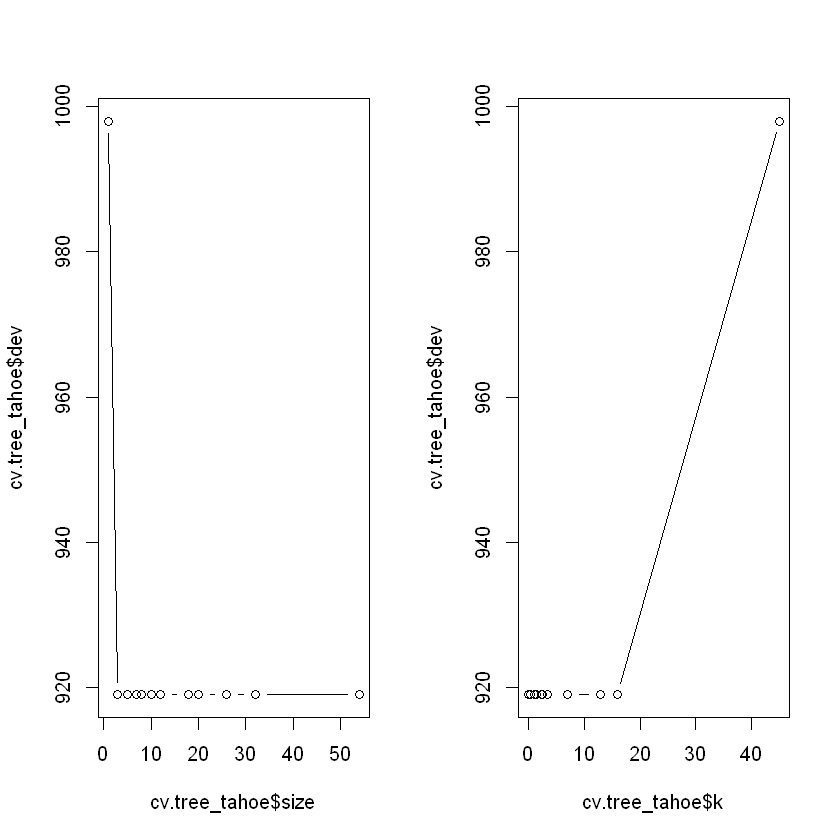

In [166]:
par(mfrow = c(1,2))
#Here deviance is actually the number of misclassification
plot(cv.tree_tahoe$size,cv.tree_tahoe$dev,type = "b")
plot(cv.tree_tahoe$k,cv.tree_tahoe$dev,type = "b")

In [167]:
cv.tree_tahoe

$size
 [1] 54 32 26 20 18 12 10  8  7  5  3  1

$dev
 [1] 919 919 919 919 919 919 919 919 919 919 919 998

$k
 [1]       -Inf  0.0000000  0.3333333  1.0000000  1.5000000  2.3333333
 [7]  2.5000000  3.5000000  7.0000000 13.0000000 16.0000000 45.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

In [168]:
prune.cv.tree_tahoe = prune.tree(tree_tahoe, best=3)

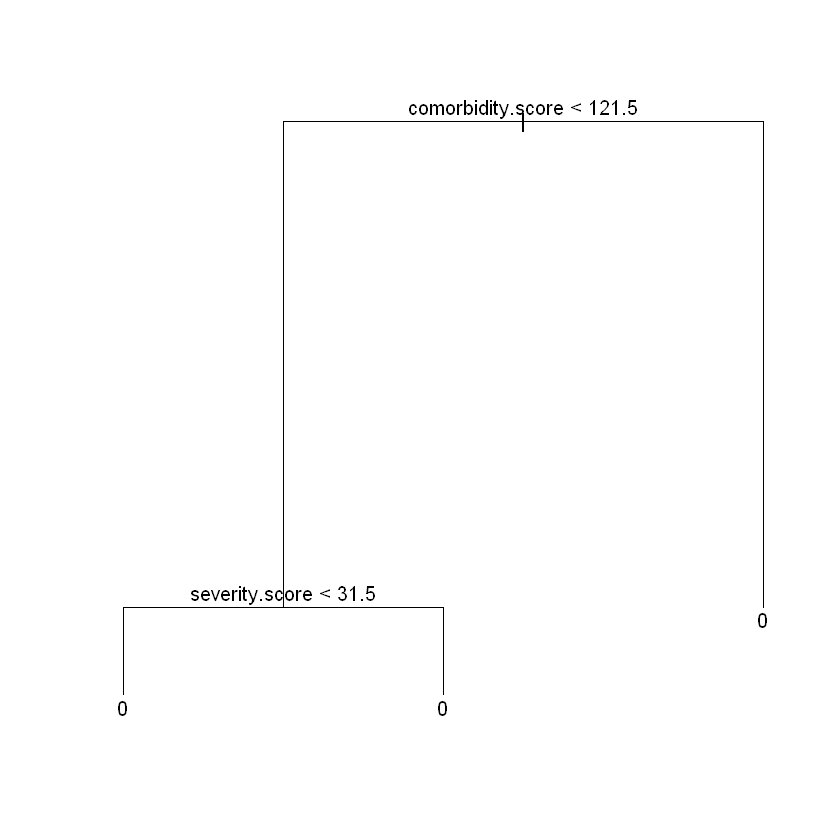

In [169]:
# final pruned tree
plot(prune.cv.tree_tahoe)
text(prune.cv.tree_tahoe, pretty = 0)

### (c)

In [170]:
prune.cv.tree_tahoe

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

1) root 4382 4702.0 0 ( 0.7723 0.2277 )  
  2) comorbidity.score < 121.5 3084 2440.0 0 ( 0.8651 0.1349 )  
    4) severity.score < 31.5 2423 1609.0 0 ( 0.8968 0.1032 ) *
    5) severity.score > 31.5 661  745.1 0 ( 0.7489 0.2511 ) *
  3) comorbidity.score > 121.5 1298 1786.0 0 ( 0.5516 0.4484 ) *

In [171]:
# predict(prune.cv.tree_tahoe,newdata =tahoe)[,2] denotes the probability of readmit30 =1
# so sum (predict(prune.cv.tree_tahoe,newdata =tahoe)[,2]>0.15 returns the number of people exceeding threshold 0.15
sum (predict(prune.cv.tree_tahoe,newdata =tahoe)[,2]>0.15)

[1] 1959

<b>We could also get this number by choosing leaf node 5) 3) as they pass threshold 0.15, so the total number of people should receive CareTracker is 661 + 1298 = 1959. <b>

In [172]:
nrow(tahoe)

[1] 4382

In [173]:
1959/4382

[1] 0.4470561

<b>So the percentage is 1959/4382 = 44.7 %<b>

### (d)

<b> We pick demographic parity and unawareness as fairness measures.

In [174]:
# demographic parity - P(C(X,A) = 1 |A = 1) = P(C(X,A) = 1 |A = 0)
# p1 denotes the probability of receiving CareTracker for females
# p1 denotes the probability of receiving CareTracker for non-females
number.females = sum(tahoe$female==1)
number.non_females = sum(tahoe$female==0)
number.females.withCareTacker = sum(predict(prune.cv.tree_tahoe,newdata =tahoe[tahoe$female==1,])[,2]>0.15)
number.non_females.withCareTacker = sum(predict(prune.cv.tree_tahoe,newdata =tahoe[tahoe$female==0,])[,2]>0.15)
p1 = number.females.withCareTacker/number.females
p2 = number.non_females.withCareTacker / number.non_females
print(c(p1,p2))
p1-p2

[1] 0.4815175 0.4165950


[1] 0.0649225

<b>We still have 6.49% gap between females and non-females<b>

In [175]:
# unawareness - P(C(X, A) = 1) = P(C(X) = 1)
# p.XA denotes the probability of receiving CareTracker awaring of gender
# p.XA denotes the probability of receiving CareTracker without awareness of gender
tahoe2 <- tahoe
tahoe2$female <- c(rep(0, nrow(tahoe)))

number.withCareTacker.X_A = sum(predict(prune.cv.tree_tahoe,newdata =tahoe)[,2]>0.15)
number.withCareTacker.X = sum(predict(prune.cv.tree_tahoe,newdata = tahoe2)[,2]>0.15)

p.XA = number.withCareTacker.X_A / nrow(tahoe)
p.X = number.withCareTacker.X / nrow(tahoe)
print(c(p.XA,p.X))
p.XA - p.X

[1] 0.4470561 0.4470561


[1] 0

<b>It seems fair.<b>

### (e)

<b>I think demographic parity is the most important fair measure since we do have gap and it is not fair, while unawareness is the least important since we do not even use `female` in the pruned tree.<b>

## Problem 2

### (a)

In [109]:
college <- read.csv("CollegeData.csv")

In [110]:
head(college)

,INSTNM,SAT_AVG,UGDS,COSTT4_A,TUITIONFEE_OUT,TUITFTE,AVGFACSAL,PFTFAC,C150_4,PFTFTUG1_EF
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,California Institute of Technology,1534,977,56382,41538,15679,16120,0.9570,0.9307,0.9725
2,University of Chicago,1504,5697,62425,47514,26409,16589,0.8076,0.9268,0.9834
3,Massachusetts Institute of Technology,1503,4510,57010,43498,28012,15617,0.9862,0.9307,0.9721
4,Harvard University,1501,7278,57950,42292,27867,17861,0.8595,0.9747,0.4143
5,Yale University,1497,5422,59320,44000,14701,16042,0.7281,0.9779,0.9777
6,Princeton University,1495,5234,55430,40170,13049,15711,0.8485,0.9694,1.0000


In [111]:
# drop na
college <- na.omit(college)

In [112]:
str(college)

'data.frame':	1136 obs. of  10 variables:
 $ INSTNM        : chr  "California Institute of Technology" "University of Chicago" "Massachusetts Institute of Technology" "Harvard University" ...
 $ SAT_AVG       : int  1534 1504 1503 1501 1497 1495 1475 1474 1471 1466 ...
 $ UGDS          : int  977 5697 4510 7278 5422 5234 6794 6851 7970 6980 ...
 $ COSTT4_A      : int  56382 62425 57010 57950 59320 55430 59890 62594 61540 58408 ...
 $ TUITIONFEE_OUT: int  41538 47514 43498 42292 44000 40170 42978 44841 49138 43683 ...
 $ TUITFTE       : int  15679 26409 28012 27867 14701 13049 22796 23619 31924 23849 ...
 $ AVGFACSAL     : int  16120 16589 15617 17861 16042 15711 12871 13286 15706 19862 ...
 $ PFTFAC        : num  0.957 0.808 0.986 0.86 0.728 ...
 $ C150_4        : num  0.931 0.927 0.931 0.975 0.978 ...
 $ PFTFTUG1_EF   : num  0.973 0.983 0.972 0.414 0.978 ...
 - attr(*, "na.action")= 'omit' Named int [1:47] 22 28 36 145 177 187 236 240 257 259 ...
  ..- attr(*, "names")= chr [1:47] "22

In [113]:
# We do not need INSTNM
college <- subset(college, select = -`INSTNM`)

In [114]:
college.scale <- scale(college, center = TRUE, scale = TRUE)

In [117]:
k_range = c (1:50)
total_variance = rep(0,50)
for (k in 1:50) {
    total_variance[k] <- kmeans(college.scale, centers = k, nstart = 10, iter.max = 15)$`tot.withinss`
}

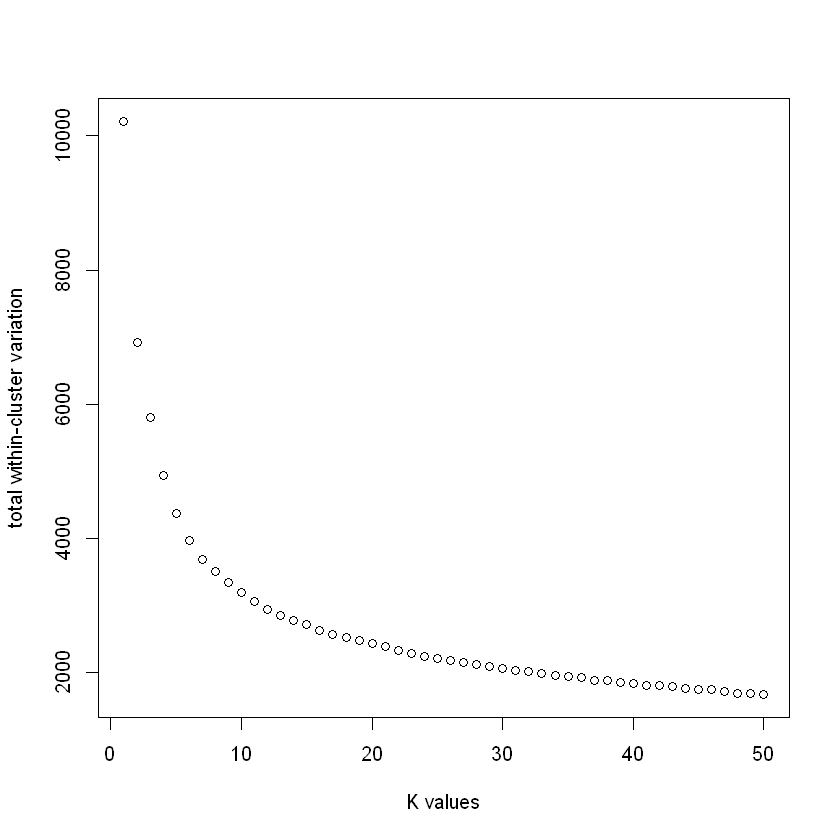

In [118]:
plot(k_range, total_variance, 
    xlab = "K values", ylab = "total within-cluster variation")

<b>I will choose K to be 8.<b>

### (b)

In [119]:
college <- read.csv("CollegeData.csv")

In [120]:
college <- na.omit(college)

In [126]:
new_college_100 <- head(college[order(college$`INSTNM`),],100)

In [127]:
# We do not need INSTNM
new_college_100 <- subset(new_college_100, select = -`INSTNM`)

In [128]:
new_college_100.scale <- scale(new_college_100, center = TRUE, scale = TRUE)

In [129]:
hc.average = hclust(dist(new_college_100.scale), method = "average")

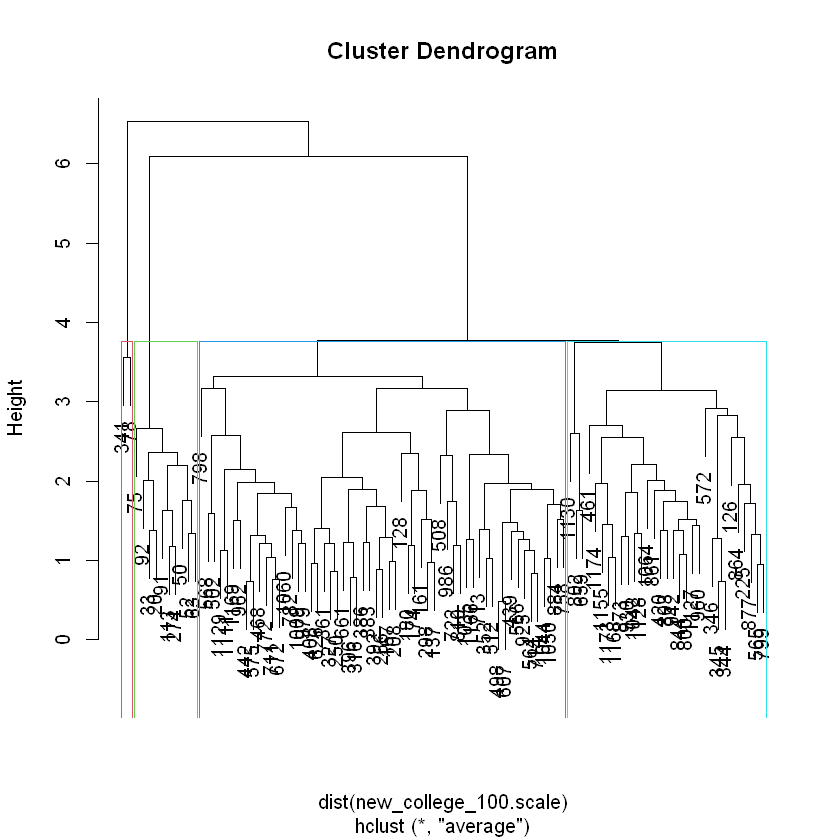

In [133]:
plot(hc.average)
rect.hclust(hc.average, k=4, border = 2:10)

In [136]:
sub_grp <- cutree(hc.average, k=4)
table(sub_grp)

sub_grp
 1  2  3  4 
57 31 10  2 

In [137]:
centroid = aggregate(new_college_100.scale,list(cluster = sub_grp), mean)
centroid

cluster,SAT_AVG,UGDS,COSTT4_A,TUITIONFEE_OUT,TUITFTE,AVGFACSAL,PFTFAC,C150_4,PFTFTUG1_EF
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.08306239,-0.4146077,0.2707976,0.1438011,0.1294921,-0.3339513,-0.28611972,0.0569641,-0.005129142
2,-0.52724194,0.3899094,-1.0317358,-0.8218523,-0.8556620,-0.1712831,0.48946200,-0.7735935,-0.407261543
3,1.89324817,0.1741540,1.8830832,1.9493824,2.0525177,2.1897702,0.03087882,1.9178066,1.181724219
4,1.07328730,4.9019538,-1.1412418,-1.1065335,-0.6903518,1.2236488,0.41335689,0.7781886,0.550113358


<b>Above are centroids. Each row is a centroid.<b>

### (c)

<b>For each number of clusters, We calculate total within sum of square. Then we plot number of clusters vs total within sum of square. After observing the plot, we use elbow method to determine number of clusters. More specifically, we could choose a ratio such as 5 %, whenever the difference between total within sum of square of consecutive k values divided by the difference of total within sum of square between k=2 and k=1 is less the 5 %, we should stop and use the last k.<b>